In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
#sns.set_style("darkgrid")
sns.set_theme(style="whitegrid")

In [2]:
files = [
    "data/CATI_LPK_MASZK_2021_10_hullam_2021_10_compl_20211030_clean_Renyi.csv",
    "data/CATI_LPK_MASZK_2021_11_hullam_2021_11_compl_20211125_clean_Renyi.csv",
    "data/CATI_LPK_MASZK_2021_12_hullam_2021_12_compl_20211221_clean_Renyi.csv",
    "data/CATI_LPK_MASZK_13_hullam_2022_01_compl_20220127_clean_Renyi.csv"
]
dfs = []


KSH = pd.read_csv("data/HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)

def get_central_hun(df):
    pest = ["Budapest"]+["Alsónémedi","Biatorbágy","Budajenő","Budakalász","Budakeszi","Budaörs","Csobánka","Csomád","Csömör","Csörög","Dabas","Délegyháza","Diósd","Dunabogdány","Dunaharaszti","Dunakeszi","Dunavarsány","Ecser","Erdőkertes","Érd","Felsőpakony","Fót","Göd","Gödöllő","Gyál","Gyömrő","Halásztelek","Herceghalom","Inárcs","Isaszeg","Kakucs","Kerepes","Kistarcsa","Kisoroszi","Leányfalu","Majosháza","Maglód","Mogyoród","Monor","Nagykovácsi","Nagytarcsa","Ócsa","Őrbottyán","Páty","Perbál","Pécel","Pilisborosjenő","Piliscsaba","Pilisjászfalu","Pilisszántó","Pilisszentiván","Pilisszentkereszt","Pilisszentlászló","Pilisvörösvár","Pomáz","Pócsmegyer","Pusztazámor","Remeteszőlős","Solymár","Sóskút","Szada","Százhalombatta","Szentendre","Szigethalom","Szigetmonostor","Szigetszentmiklós","Sződ","Sződliget","Tahitótfalu","Taksony","Tárnok","Telki","Tinnye","Tök","Tököl","Törökbálint","Újhartyán","Újlengyel","Üllő","Üröm","Vác","Vácrátót","Vecsés","Veresegyház","Visegrád","Zsámbék"]
    no_pest = [k for k in set(df["K15A"].array) if k not in pest]
    pest = [k for k in set(df["K15A"].array) if k in pest]
    
    centralHun = pd.DataFrame({
        "central":np.concatenate((np.ones(len(pest), dtype=int), np.zeros(len(no_pest), dtype=int))),
        "K15A":pest+no_pest
    })
    return centralHun
    
for time, file in enumerate(files):
    df = pd.read_csv(file,
               #sep=',' if time == 1 else ';',
               sep=';',
               header=0)
    
    df['K15A'] = df['K15A'].str.title()

    # Fix data
    df = df.replace("Kömlő", "Kömlőd")
    df = df.replace("Hódosér (Bakonyszentlászló)", "Bakonyszentlászló")
    df = df.replace("Kaszaper-Pusztaszőlős", "Kaszaper")
    df = df.replace("Pusztaszőlős (Kaszaper)", "Kaszaper")
    
    print(f"[{time}] Error in {file}: {set(df['K15A']).difference(set(KSH['place']))}")
    
    # Merge KSH
    df=pd.merge(df, KSH, left_on="K15A", right_on="place")
    
    # Central hun
    df_old=df.merge(get_central_hun(df), on="K15A")
    df_old["time"]=time
    #df_old["SZUL"]=2021-df_new["K1"]
    dfs.append(df_old)

[0] Error in data/CATI_LPK_MASZK_2021_10_hullam_2021_10_compl_20211030_clean_Renyi.csv: set()
[1] Error in data/CATI_LPK_MASZK_2021_11_hullam_2021_11_compl_20211125_clean_Renyi.csv: set()
[2] Error in data/CATI_LPK_MASZK_2021_12_hullam_2021_12_compl_20211221_clean_Renyi.csv: set()
[3] Error in data/CATI_LPK_MASZK_13_hullam_2022_01_compl_20220127_clean_Renyi.csv: set()


In [3]:
for i in range(4):
    print(len(dfs[i]["SZUL"]))

1000
1000
1000
1000


In [4]:
#dfs[3]["súly"]
df = pd.concat(dfs, axis=0)
df

,RecordNo,CALLDAY,QUESTDAY,hetk_hetv,DE_COUNT,teltip,DE_REG2,DE_AGEG,K15A,kshkod,...,K91_2C7,K91_2C8,K91_2C8O,K91_3_01,K91_3_02,K91_3_03,K91_3_04,K91_3_05,K91_3_06,K91_3_07
0,1,20211024,20211024,2,8,2,3,2,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,391,20211026,20211026,1,8,2,3,5,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,545,20211027,20211027,1,8,2,3,6,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,839,20211028,20211028,1,8,2,3,5,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1221,20211028,20211028,1,8,2,3,6,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35790,20220127,20220127,1,6,4,5,6,Kápolnásnyék,NaN,...,0.0,0.0,,5.0,5.0,5.0,3.0,5.0,5.0,5.0
996,7529,20220127,20220127,1,13,4,6,6,Bugyi,NaN,...,0.0,0.0,,1.0,5.0,5.0,5.0,5.0,5.0,5.0
997,1573,20220124,20220124,2,4,4,4,6,Sárazsadány,NaN,...,0.0,0.0,,5.0,5.0,5.0,5.0,5.0,5.0,5.0
998,4951,20220125,20220125,1,14,4,2,6,Törökkoppány,NaN,...,1.0,0.0,,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [5]:
from survey_plots import plot_distance_dep, plot_size_dep

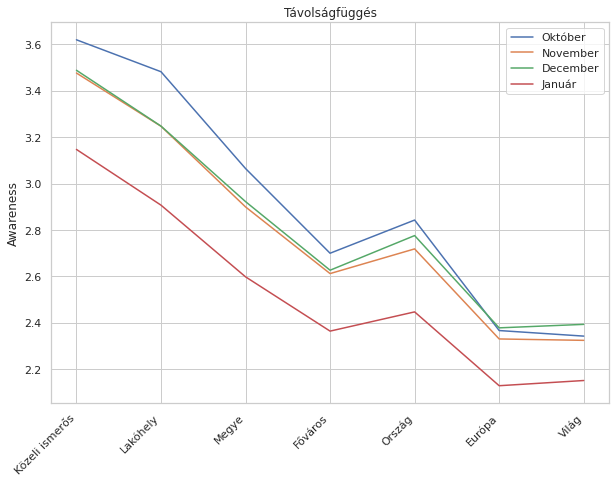

In [6]:
months = ["Október", "November", "December", "Január"]
criterions = [df["time"]==i for i in range(len(months))]
plot_distance_dep(df, criterions, months, "Távolságfüggés")

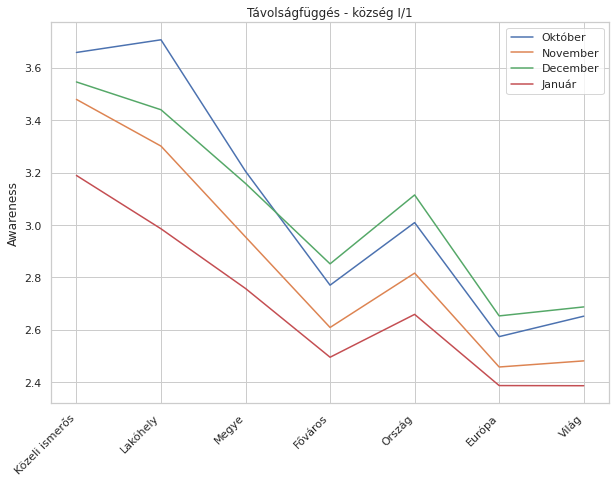

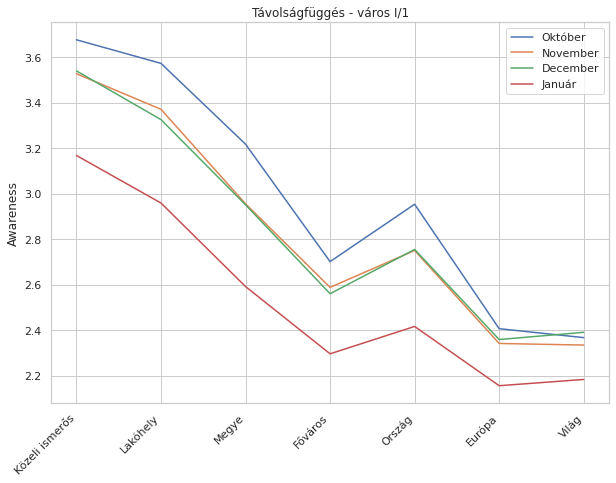

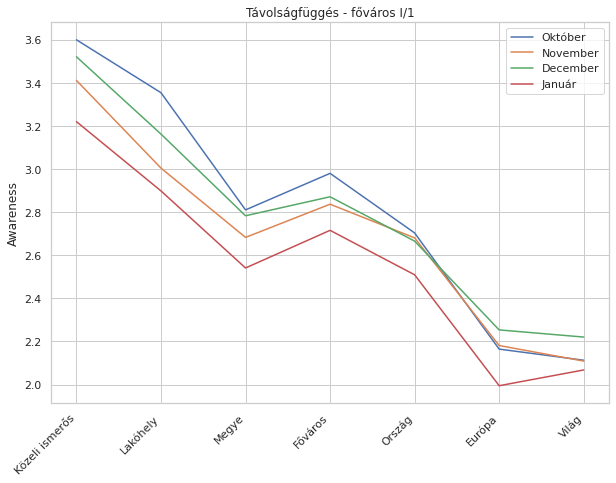

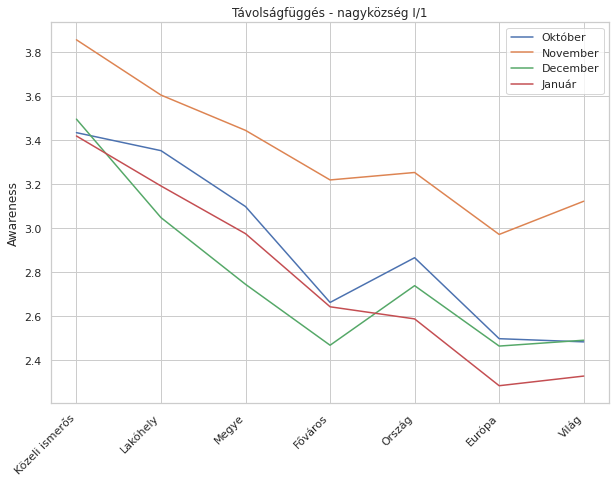

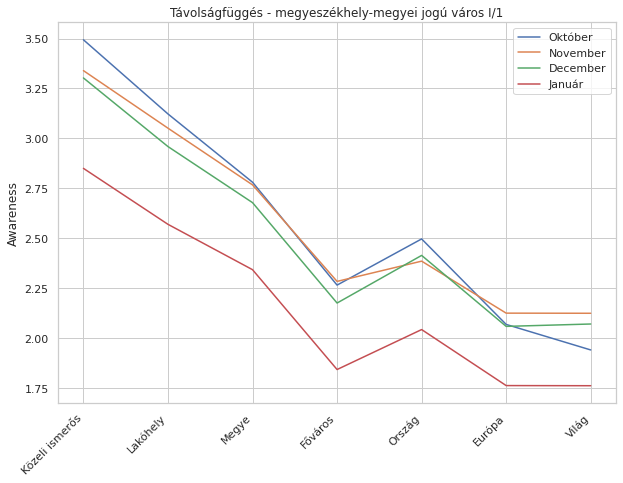

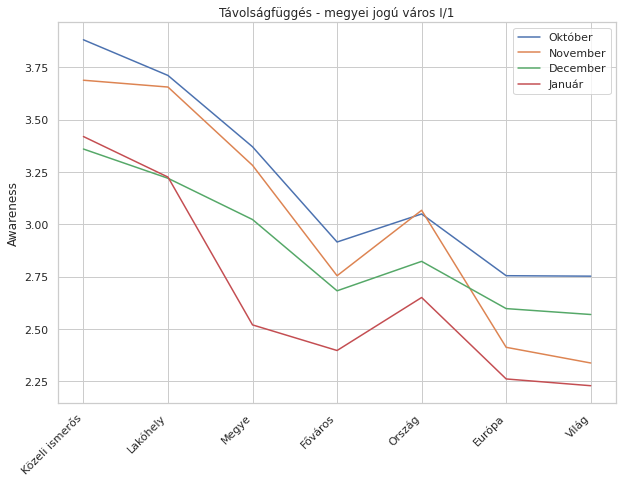

In [7]:
settlements = ["község", "város", "főváros", "nagyközség", "megyeszékhely-megyei jogú város", "megyei jogú város"]

for sett in settlements:
    criterions = [(df["settlement type"]==sett) & (df['time']==i) for i in range(4)]
    #labels = ["város_old", "község_old", "főváros_old"]+["város_new", "község_new", "főváros_new"]
    labels = months
    plot_distance_dep(df, criterions, labels, f"Távolságfüggés - {sett} I/1")

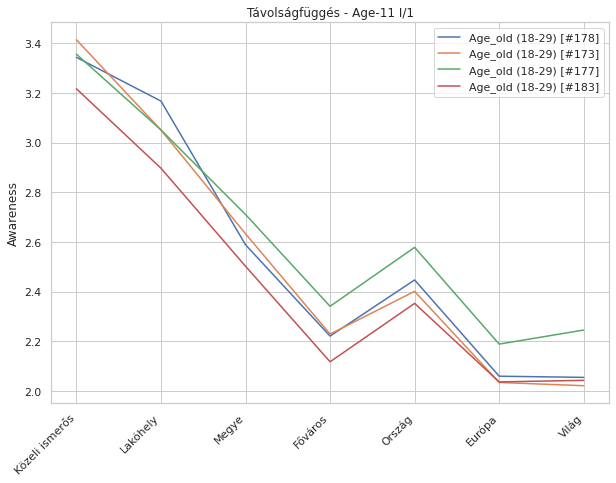

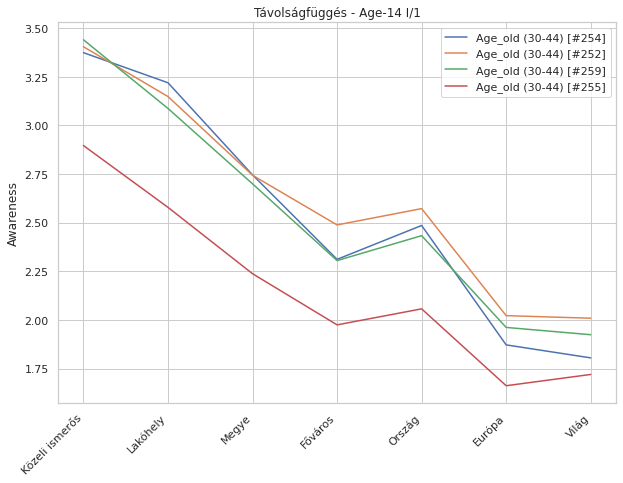

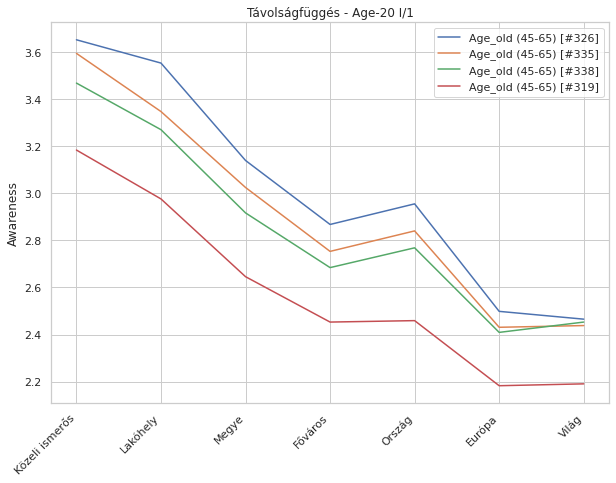

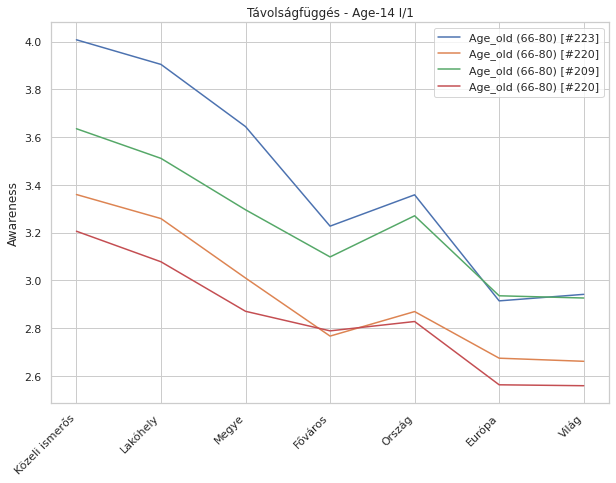

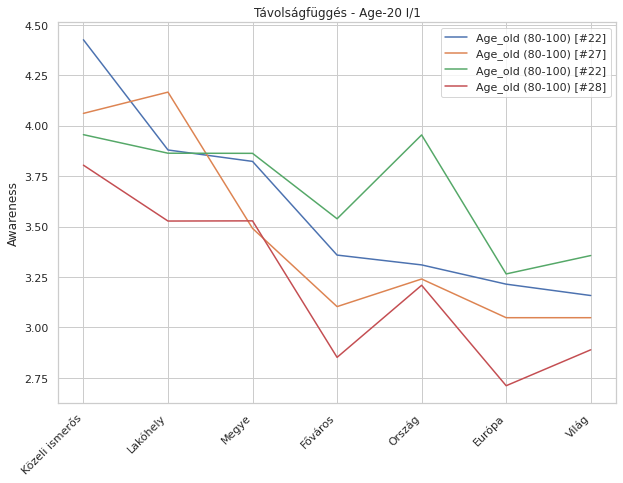

In [8]:
age_arr0 = [(18,29), (30,44), (45, 65), (66,80), (80,100)]
for a,b in age_arr0:
    criterions = [(df["SZUL"]>=a) & (df["SZUL"]<=b) & (df["time"]==i) for i in range(4)]
    labels = [f"Age_old ({a}-{b}) [#{len(df[c])}]" for c in criterions]
    plot_distance_dep(df, criterions, labels, f"Távolságfüggés - Age{a-b} I/1")

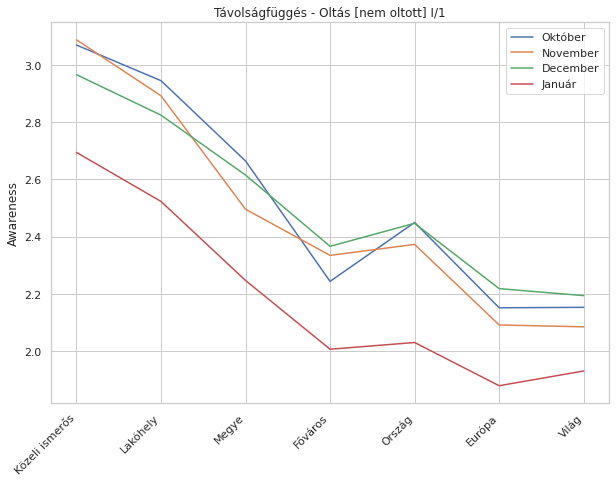

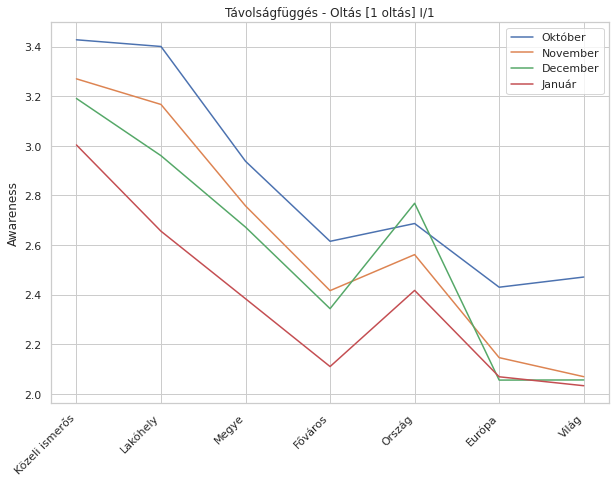

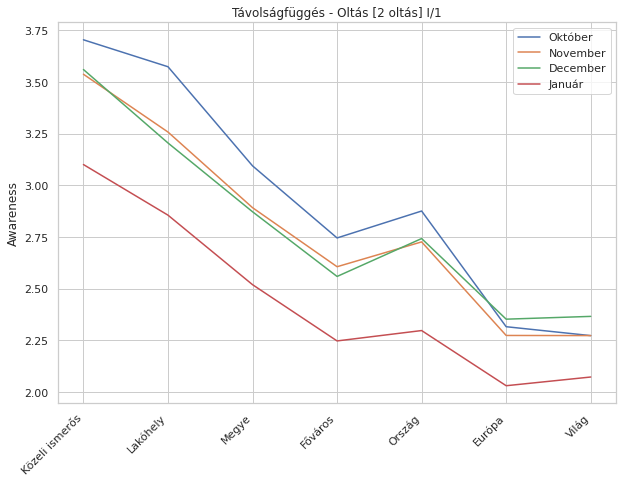

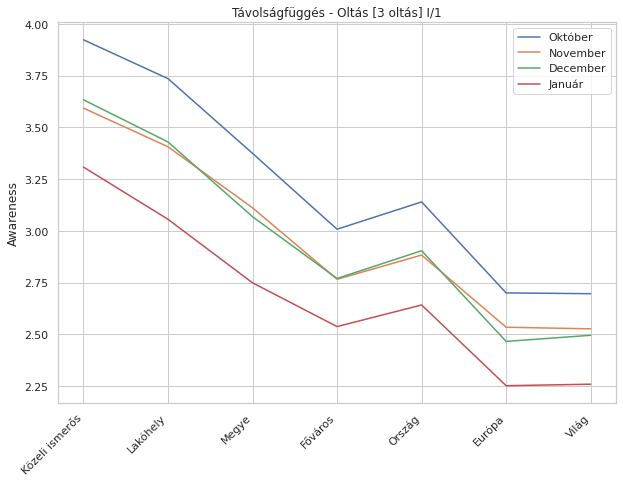

In [9]:
oltas= ["nem oltott", "1 oltás", "2 oltás", "3 oltás"]
criterions = [df["K24"]==2, df["K25_1"]==1, df["K25_1"]==2, df["K25_1"]==3]

for label,crit in zip(oltas, criterions):
    criterions = [crit & (df["time"]==i) for i in range(4)]
    labels = months
    plot_distance_dep(df, criterions, labels, f"Távolságfüggés - Oltás [{label}] I/1")

In [10]:
df

,RecordNo,CALLDAY,QUESTDAY,hetk_hetv,DE_COUNT,teltip,DE_REG2,DE_AGEG,K15A,kshkod,...,K91_2C7,K91_2C8,K91_2C8O,K91_3_01,K91_3_02,K91_3_03,K91_3_04,K91_3_05,K91_3_06,K91_3_07
0,1,20211024,20211024,2,8,2,3,2,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,391,20211026,20211026,1,8,2,3,5,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,545,20211027,20211027,1,8,2,3,6,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,839,20211028,20211028,1,8,2,3,5,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1221,20211028,20211028,1,8,2,3,6,Debrecen,15130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35790,20220127,20220127,1,6,4,5,6,Kápolnásnyék,NaN,...,0.0,0.0,,5.0,5.0,5.0,3.0,5.0,5.0,5.0
996,7529,20220127,20220127,1,13,4,6,6,Bugyi,NaN,...,0.0,0.0,,1.0,5.0,5.0,5.0,5.0,5.0,5.0
997,1573,20220124,20220124,2,4,4,4,6,Sárazsadány,NaN,...,0.0,0.0,,5.0,5.0,5.0,5.0,5.0,5.0,5.0
998,4951,20220125,20220125,1,14,4,2,6,Törökkoppány,NaN,...,1.0,0.0,,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [11]:
from survey_plots import mysurvey, critsurvey

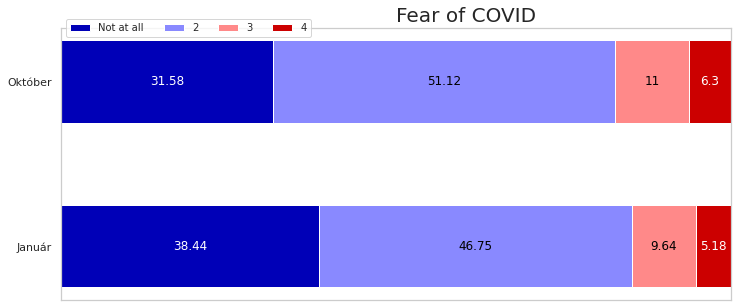

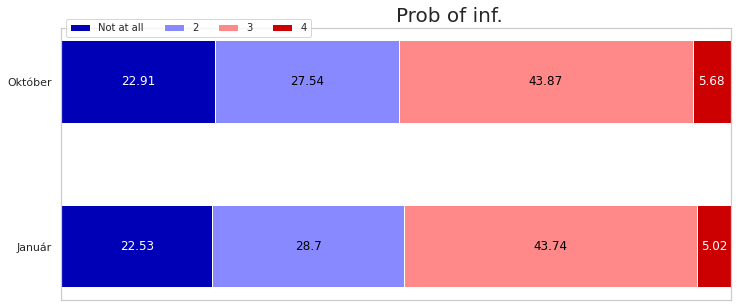

In [12]:
for question_id,question_name  in zip([ 'K89', 'K90'],
                                      ["Fear of COVID", "Prob of inf."]):
    fig,ax=critsurvey(
        df,
        [question_id]*2,
        [months[0], months[-1]],
        ["Not at all", "2", "3", "4", "Very serious"],
        [(df["K89"]>0) & (df["time"]==i) for i in [0,3]],
        figsize=(12,5))

    plt.title(f"{question_name}", fontsize=20, ha="left")
    plt.show()